In [2]:
import pandas as pd
from utils.data_processing import add_nearest_neighbour_labels, add_binary_labels
from pathlib import Path

def test_add_nearest_neighbour_labels_pairing():
    df = pd.DataFrame(
        {
            "mu_target": [1.0, 1.1, 2.0, 2.05],
            "cv_target": [0.1, 0.1, 0.2, 0.2],
            "t_ac_target": [0.5, 0.5, 0.6, 0.6],
        }
    )
    labelled = add_nearest_neighbour_labels(df)
    assert labelled["label"].tolist() == [0, 1, 0, 1]


In [10]:
##### Set up directory paths for data loading ######
BASE_DIR = Path('/home/ianyang/stochastic_simulations/experiments/EXP-25-IY010')
RESULTS_CSV = Path("IY010_simulation_parameters_6.csv")
results_csv_path = BASE_DIR / RESULTS_CSV
RESULTS_CSV = "IY010_simulation_parameters_6.csv"
results_csv_path = BASE_DIR / RESULTS_CSV
results = pd.read_csv(results_csv_path)
results = results[results["success"]].dropna(
    subset=["mu_observed", "cv_observed", "t_ac_observed"]
)

label_column = "mu_target"
binary_labelled_results = add_binary_labels(results, label_column)
nearest_neighbour_labelled_results = add_nearest_neighbour_labels(results)

In [11]:
binary_labelled_results

,mu_target,t_ac_target,cv_target,sigma_sum,success,error_message,rho,d,sigma_b,sigma_u,mu_observed,cv_observed,t_ac_observed,variance_observed,mean_rel_error_pct,cv_rel_error_pct,t_ac_rel_error_pct,trajectory_filename,label
0,4310.863714,81.529613,1.709619,1,True,NaN,12808.778872,0.012419,0.004180,0.995820,4848.580315,1.696271,82.862979,6.764249e+07,12.473524,0.780777,1.635438,mRNA_trajectories_4310.864_1.710_81.530.csv,0
1,8698.265540,44.030695,1.248102,1,True,NaN,14065.944178,0.023246,0.014375,0.985625,8887.513422,1.316592,42.350282,1.369187e+08,2.175697,5.487504,3.816457,mRNA_trajectories_8698.266_1.248_44.031.csv,1
2,5779.576590,51.261031,1.589705,1,True,NaN,15010.582279,0.019900,0.007662,0.992338,6067.793537,1.583907,51.910655,9.236789e+07,4.986818,0.364721,1.267288,mRNA_trajectories_5779.577_1.590_51.261.csv,1
3,1369.528419,24.251698,0.547744,1,True,NaN,486.483623,0.043044,0.121176,0.878824,1381.730435,0.539760,23.786650,5.562221e+05,0.890965,1.457523,1.917588,mRNA_trajectories_1369.528_0.548_24.252.csv,0
4,434.899626,71.640331,1.034264,1,True,NaN,476.942112,0.014157,0.012909,0.987091,401.777107,1.058477,64.572811,1.808561e+05,7.616129,2.341047,9.865280,mRNA_trajectories_434.900_1.034_71.640.csv,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,6193.992307,85.029422,1.923801,1,True,NaN,23269.558723,0.011901,0.003168,0.996832,6919.017070,1.888193,91.615262,1.706796e+08,11.705290,1.850897,7.745366,mRNA_trajectories_6193.992_1.924_85.029.csv,1
995,1815.641138,40.530721,0.893375,1,True,NaN,1530.683836,0.025305,0.030015,0.969985,1726.102988,0.903955,42.902637,2.434599e+06,4.931489,1.184359,5.852144,mRNA_trajectories_1815.641_0.893_40.531.csv,0
996,251.192800,92.582882,0.594697,1,True,NaN,91.539771,0.010918,0.029961,0.970039,268.340192,0.569508,85.830551,2.335453e+04,6.826387,4.235669,7.293283,mRNA_trajectories_251.193_0.595_92.583.csv,0
997,7133.499253,32.929014,1.448976,1,True,NaN,15668.813500,0.031335,0.014266,0.985734,7773.743186,1.473683,35.244511,1.312407e+08,8.975173,1.705126,7.031782,mRNA_trajectories_7133.499_1.449_32.929.csv,1


# Comparison of Binary vs Nearest Neighbour Labelling Methods

Let's visualize how the two labelling methods differ in their class assignments based on the target parameters.

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create comparison dataset
comparison_df = results.copy()
comparison_df['binary_label'] = binary_labelled_results['label']
comparison_df['nn_label'] = nearest_neighbour_labelled_results['label']

# Calculate agreement between methods
agreement = (comparison_df['binary_label'] == comparison_df['nn_label']).mean()
print(f"Agreement between methods: {agreement:.2%}")

# Show class distributions
print("\nClass distributions:")
print("Binary method:", comparison_df['binary_label'].value_counts().sort_index().tolist())
print("Nearest neighbour method:", comparison_df['nn_label'].value_counts().sort_index().tolist())

Agreement between methods: 50.20%

Class distributions:
Binary method: [490, 490]
Nearest neighbour method: [490, 490]


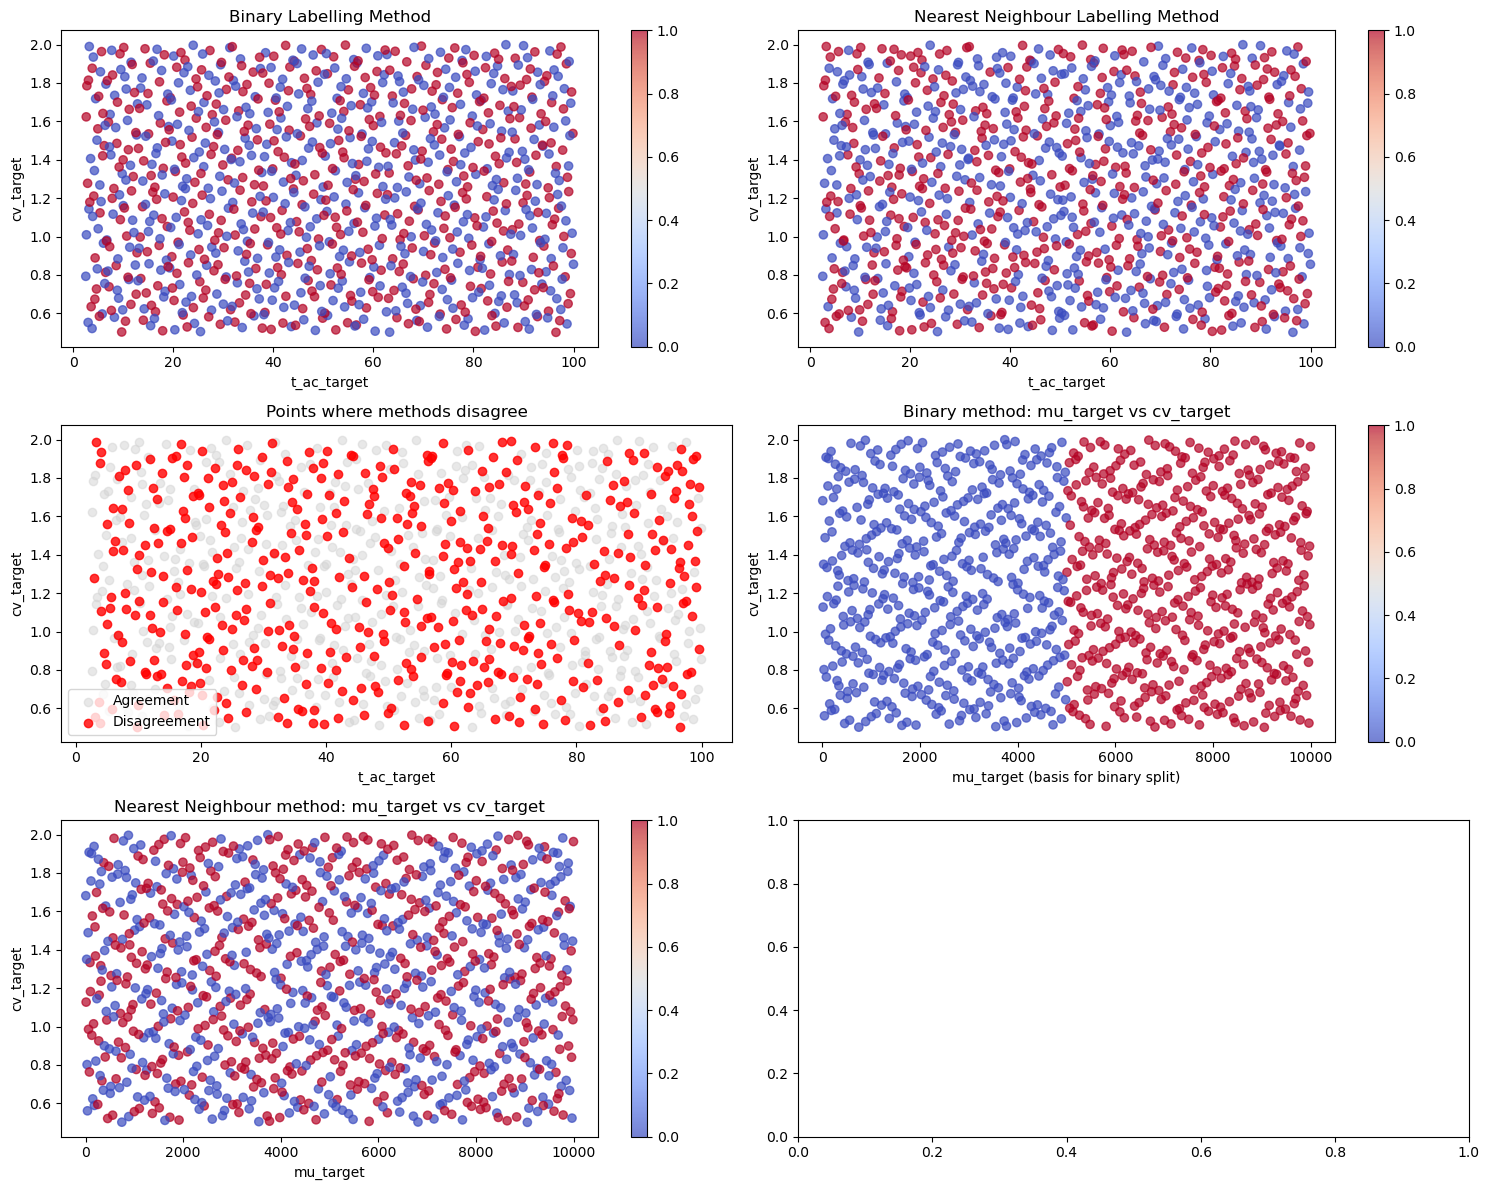

In [22]:
# Create scatter plots to visualize the differences
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot 1: Binary method - t_ac vs cv colored by label
scatter1 = axes[0, 0].scatter(comparison_df['t_ac_target'], comparison_df['cv_target'], 
                             c=comparison_df['binary_label'], cmap='coolwarm', alpha=0.7)
axes[0, 0].set_xlabel('t_ac_target')
axes[0, 0].set_ylabel('cv_target')
axes[0, 0].set_title('Binary Labelling Method')
plt.colorbar(scatter1, ax=axes[0, 0])

# Plot 2: Nearest neighbour method - t_ac vs cv colored by label
scatter2 = axes[0, 1].scatter(comparison_df['t_ac_target'], comparison_df['cv_target'], 
                             c=comparison_df['nn_label'], cmap='coolwarm', alpha=0.7)
axes[0, 1].set_xlabel('t_ac_target')
axes[0, 1].set_ylabel('cv_target')
axes[0, 1].set_title('Nearest Neighbour Labelling Method')
plt.colorbar(scatter2, ax=axes[0, 1])

# Plot 3: Disagreement points
disagreement_mask = comparison_df['binary_label'] != comparison_df['nn_label']
axes[1, 0].scatter(comparison_df.loc[~disagreement_mask, 't_ac_target'], 
                  comparison_df.loc[~disagreement_mask, 'cv_target'], 
                  c='lightgray', alpha=0.5, label='Agreement')
axes[1, 0].scatter(comparison_df.loc[disagreement_mask, 't_ac_target'], 
                  comparison_df.loc[disagreement_mask, 'cv_target'], 
                  c='red', alpha=0.8, label='Disagreement')
axes[1, 0].set_xlabel('t_ac_target')
axes[1, 0].set_ylabel('cv_target')
axes[1, 0].set_title('Points where methods disagree')
axes[1, 0].legend()

# Plot 4: mu_target vs cv_target to show the basis for binary split
scatter4 = axes[1, 1].scatter(comparison_df['mu_target'], comparison_df['cv_target'], 
                             c=comparison_df['binary_label'], cmap='coolwarm', alpha=0.7)
axes[1, 1].set_xlabel('mu_target (basis for binary split)')
axes[1, 1].set_ylabel('cv_target')
axes[1, 1].set_title('Binary method: mu_target vs cv_target')
plt.colorbar(scatter4, ax=axes[1, 1])

# Plot 5: mu_target vs cv_target for nearest neighbour method
scatter5 = axes[2, 0].scatter(comparison_df['mu_target'], comparison_df['cv_target'], 
                             c=comparison_df['nn_label'], cmap='coolwarm', alpha=0.7)
axes[2, 0].set_xlabel('mu_target')
axes[2, 0].set_ylabel('cv_target')
axes[2, 0].set_title('Nearest Neighbour method: mu_target vs cv_target')
plt.colorbar(scatter5, ax=axes[2, 0])

plt.tight_layout()
plt.show()

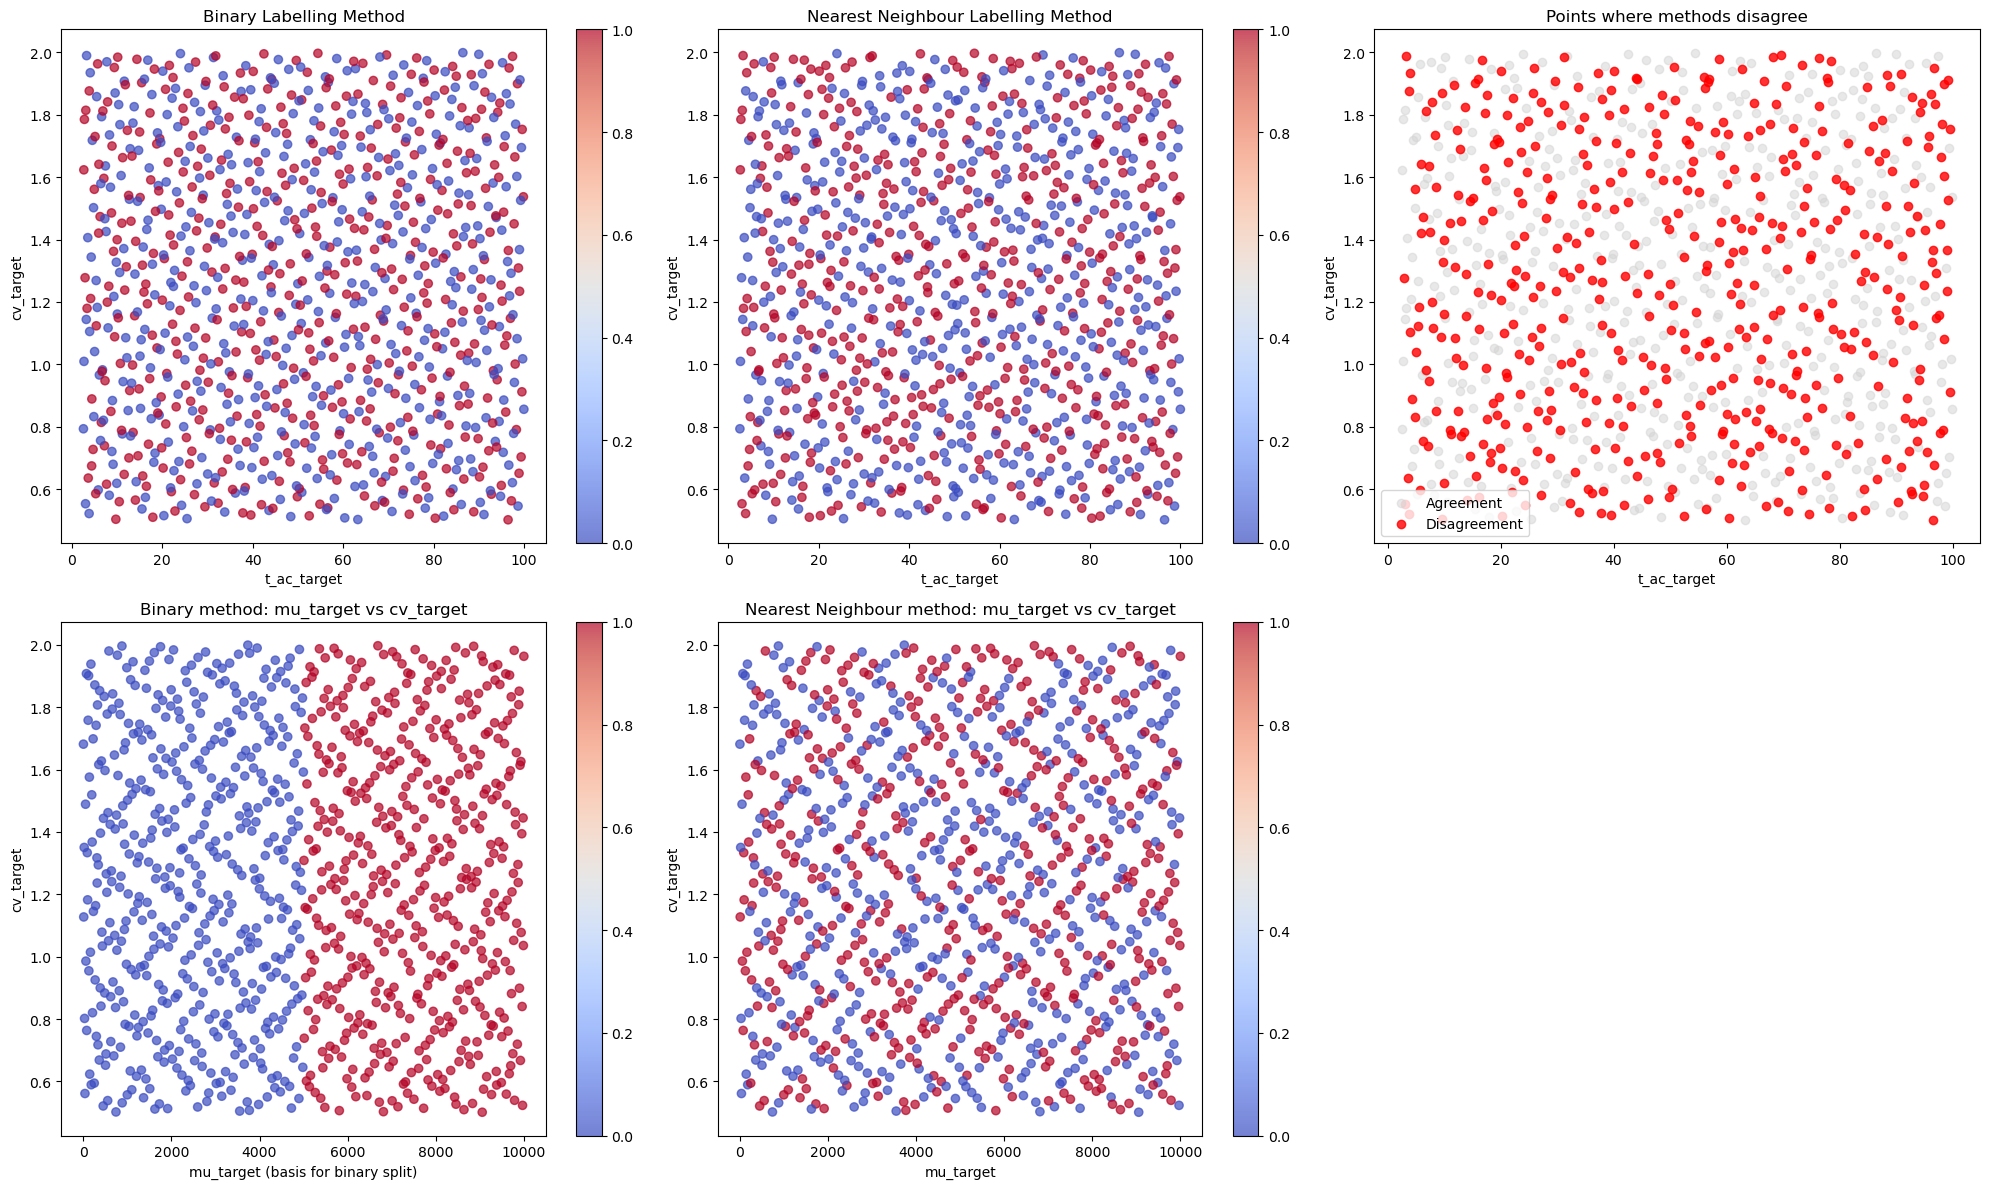

In [20]:
# Create a new figure with 2x3 layout to accommodate 5 plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Plot 1: Binary method - t_ac vs cv colored by label
scatter1 = axes[0, 0].scatter(comparison_df['t_ac_target'], comparison_df['cv_target'], 
                             c=comparison_df['binary_label'], cmap='coolwarm', alpha=0.7)
axes[0, 0].set_xlabel('t_ac_target')
axes[0, 0].set_ylabel('cv_target')
axes[0, 0].set_title('Binary Labelling Method')
plt.colorbar(scatter1, ax=axes[0, 0])

# Plot 2: Nearest neighbour method - t_ac vs cv colored by label
scatter2 = axes[0, 1].scatter(comparison_df['t_ac_target'], comparison_df['cv_target'], 
                             c=comparison_df['nn_label'], cmap='coolwarm', alpha=0.7)
axes[0, 1].set_xlabel('t_ac_target')
axes[0, 1].set_ylabel('cv_target')
axes[0, 1].set_title('Nearest Neighbour Labelling Method')
plt.colorbar(scatter2, ax=axes[0, 1])

# Plot 3: Disagreement points
disagreement_mask = comparison_df['binary_label'] != comparison_df['nn_label']
axes[0, 2].scatter(comparison_df.loc[~disagreement_mask, 't_ac_target'], 
                  comparison_df.loc[~disagreement_mask, 'cv_target'], 
                  c='lightgray', alpha=0.5, label='Agreement')
axes[0, 2].scatter(comparison_df.loc[disagreement_mask, 't_ac_target'], 
                  comparison_df.loc[disagreement_mask, 'cv_target'], 
                  c='red', alpha=0.8, label='Disagreement')
axes[0, 2].set_xlabel('t_ac_target')
axes[0, 2].set_ylabel('cv_target')
axes[0, 2].set_title('Points where methods disagree')
axes[0, 2].legend()

# Plot 4: mu_target vs cv_target for binary method
scatter4 = axes[1, 0].scatter(comparison_df['mu_target'], comparison_df['cv_target'], 
                             c=comparison_df['binary_label'], cmap='coolwarm', alpha=0.7)
axes[1, 0].set_xlabel('mu_target (basis for binary split)')
axes[1, 0].set_ylabel('cv_target')
axes[1, 0].set_title('Binary method: mu_target vs cv_target')
plt.colorbar(scatter4, ax=axes[1, 0])

# Plot 5: mu_target vs cv_target for nearest neighbour method
scatter5 = axes[1, 1].scatter(comparison_df['mu_target'], comparison_df['cv_target'], 
                             c=comparison_df['nn_label'], cmap='coolwarm', alpha=0.7)
axes[1, 1].set_xlabel('mu_target')
axes[1, 1].set_ylabel('cv_target')
axes[1, 1].set_title('Nearest Neighbour method: mu_target vs cv_target')
plt.colorbar(scatter5, ax=axes[1, 1])

# Hide the unused subplot
axes[1, 2].set_visible(False)

plt.tight_layout()
plt.show()

In [14]:
# Statistical analysis of the differences
print("=== Statistical Analysis ===\n")

# Group statistics by label for each method
for method_name, label_col in [("Binary", "binary_label"), ("Nearest Neighbour", "nn_label")]:
    print(f"{method_name} Method:")
    grouped = comparison_df.groupby(label_col)[['t_ac_target', 'cv_target', 'mu_target']].agg(['mean', 'std'])
    print(grouped.round(4))
    print()

# Analyze disagreement patterns
disagreements = comparison_df[comparison_df['binary_label'] != comparison_df['nn_label']]
print(f"Number of disagreements: {len(disagreements)}")

if len(disagreements) > 0:
    print("\nDisagreement summary statistics:")
    print(disagreements[['t_ac_target', 'cv_target', 'mu_target']].describe())

=== Statistical Analysis ===

Binary Method:
             t_ac_target          cv_target          mu_target           
                    mean      std      mean     std       mean        std
binary_label                                                             
0                51.2174  28.2180    1.2478  0.4337  2502.3413  1442.6097
1                51.2733  28.1605    1.2523  0.4336  7499.3766  1442.0802

Nearest Neighbour Method:
         t_ac_target          cv_target          mu_target           
                mean      std      mean     std       mean        std
nn_label                                                             
0            51.7417  27.8474    1.2498  0.4335  4980.8893  2888.7788
1            50.7491  28.5184    1.2503  0.4338  5020.8285  2885.4097

Number of disagreements: 488

Disagreement summary statistics:
       t_ac_target   cv_target    mu_target
count   488.000000  488.000000   488.000000
mean     51.023224    1.248468  5001.924521
std      28.

In [15]:
# Create a detailed comparison table
comparison_summary = pd.DataFrame({
    'method': ['Binary', 'Nearest Neighbour'],
    'class_0_count': [
        (comparison_df['binary_label'] == 0).sum(),
        (comparison_df['nn_label'] == 0).sum()
    ],
    'class_1_count': [
        (comparison_df['binary_label'] == 1).sum(),
        (comparison_df['nn_label'] == 1).sum()
    ]
})

comparison_summary['total'] = comparison_summary['class_0_count'] + comparison_summary['class_1_count']
comparison_summary['class_balance'] = comparison_summary['class_1_count'] / comparison_summary['total']

print("Method Comparison Summary:")
print(comparison_summary)

Method Comparison Summary:
              method  class_0_count  class_1_count  total  class_balance
0             Binary            490            490    980            0.5
1  Nearest Neighbour            490            490    980            0.5


In [16]:
nearest_neighbour_labelled_results

,mu_target,t_ac_target,cv_target,sigma_sum,success,error_message,rho,d,sigma_b,sigma_u,mu_observed,cv_observed,t_ac_observed,variance_observed,mean_rel_error_pct,cv_rel_error_pct,t_ac_rel_error_pct,trajectory_filename,label
0,4310.863714,81.529613,1.709619,1,True,NaN,12808.778872,0.012419,0.004180,0.995820,4848.580315,1.696271,82.862979,6.764249e+07,12.473524,0.780777,1.635438,mRNA_trajectories_4310.864_1.710_81.530.csv,1
1,8698.265540,44.030695,1.248102,1,True,NaN,14065.944178,0.023246,0.014375,0.985625,8887.513422,1.316592,42.350282,1.369187e+08,2.175697,5.487504,3.816457,mRNA_trajectories_8698.266_1.248_44.031.csv,1
2,5779.576590,51.261031,1.589705,1,True,NaN,15010.582279,0.019900,0.007662,0.992338,6067.793537,1.583907,51.910655,9.236789e+07,4.986818,0.364721,1.267288,mRNA_trajectories_5779.577_1.590_51.261.csv,0
3,1369.528419,24.251698,0.547744,1,True,NaN,486.483623,0.043044,0.121176,0.878824,1381.730435,0.539760,23.786650,5.562221e+05,0.890965,1.457523,1.917588,mRNA_trajectories_1369.528_0.548_24.252.csv,1
4,434.899626,71.640331,1.034264,1,True,NaN,476.942112,0.014157,0.012909,0.987091,401.777107,1.058477,64.572811,1.808561e+05,7.616129,2.341047,9.865280,mRNA_trajectories_434.900_1.034_71.640.csv,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,6193.992307,85.029422,1.923801,1,True,NaN,23269.558723,0.011901,0.003168,0.996832,6919.017070,1.888193,91.615262,1.706796e+08,11.705290,1.850897,7.745366,mRNA_trajectories_6193.992_1.924_85.029.csv,1
995,1815.641138,40.530721,0.893375,1,True,NaN,1530.683836,0.025305,0.030015,0.969985,1726.102988,0.903955,42.902637,2.434599e+06,4.931489,1.184359,5.852144,mRNA_trajectories_1815.641_0.893_40.531.csv,1
996,251.192800,92.582882,0.594697,1,True,NaN,91.539771,0.010918,0.029961,0.970039,268.340192,0.569508,85.830551,2.335453e+04,6.826387,4.235669,7.293283,mRNA_trajectories_251.193_0.595_92.583.csv,1
997,7133.499253,32.929014,1.448976,1,True,NaN,15668.813500,0.031335,0.014266,0.985734,7773.743186,1.473683,35.244511,1.312407e+08,8.975173,1.705126,7.031782,mRNA_trajectories_7133.499_1.449_32.929.csv,1
